## **Customer Financial Analysis**


Here is a comprehensive analysis of the customer financial dataset.

-  Import Libraries
-  Load Dataset
-  Perform sanity check on dataset
-  Dataset Description and Shape
-  Dataset Visualization
-  Correlational Analysis
-  Data Pre-processing and Cleaning
    - Handling Data Errors
    - Dropping Unnecessary Columns
    - Checking for Missing Values
    - Handling Outliers
-  Feature Transformation
-  Model Building
    - Splitting dataset
    - Model Implementation
    - Hyperparameter tuning
-  Performance Evaluation



## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


## Load dataset

In [2]:

file_path = "E:/0.MTECH/Semester 1/3.ML/ML-Assignment PS8/Customer_Financial_Info.csv"

# Define the correct column headers manually
# multi-line header of the CSV file
header = [
    "Customer_ID", "Age", "Years_Experience", "Annual_Income", "ZIP_Code", 
    "Family_size", "Avg_Spending", "Education_Level", "Mortgage", 
    "Has_Consumer_Loan", "Has_Securities_Account", "Has_CD_Account", 
    "Uses_Online_Banking", "Has_CreditCard"
]

# Load the CSV, skipping the malformed header and applying the correct names
df = pd.read_csv(file_path, 
    header=None,
    skiprows=7,
    names=header,
    skipinitialspace=True
)

## Perform sanity check on dataset

In [3]:
# Display the first 10 rows for a sanity check
print("First 5 rows of the dataset:")
display(df.head(5))

First 5 rows of the dataset:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
1,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
2,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
3,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
4,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0


## Dataset Description and Shape

In [4]:
# b. Dataset Description and Shape
# Print the shape of the dataset
print(f"Dataset Shape: {df.shape}")
print("\nDataset Description:")
# Print the description of the dataset
display(df.describe())

Dataset Shape: (4994, 14)

Dataset Description:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,2503.500000,45.349620,20.115739,73.809171,93153.591510,2.395875,1.938624,1.881458,56.535643,0.096115,0.104125,0.060473,0.597317,0.294153
std,1441.787953,11.463607,11.468616,46.040367,2122.120024,1.147307,1.748422,0.840091,101.749637,0.294779,0.305453,0.238384,0.490487,0.455707
min,7.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1255.250000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2503.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3751.750000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset Description:

The dataset has 5000 rows and 14 columns. A key observation from the description is in the Years_Experience column, where the minimum value is -3. This is a data error that will need to be addressed during pre-processing.


## Dataset Visualization

Visualizing the data helps in understanding distributions and imbalances.

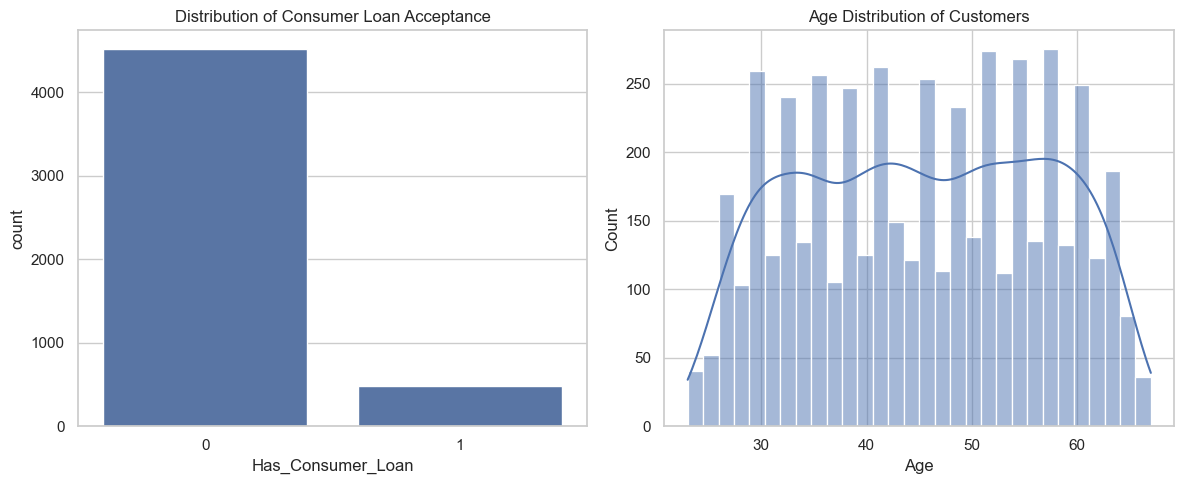

In [6]:
# Set plot stylem
sns.set(style="whitegrid")

# Plotting the distribution of the target variable 'Has_Consumer_Loan'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Has_Consumer_Loan', data=df)
plt.title('Distribution of Consumer Loan Acceptance')

# Plotting the distribution of Age
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution of Customers')
plt.tight_layout()
plt.show()

The target variable for our classification task will be Has_Consumer_Loan, indicating whether a customer has a consumer loan.The left plot shows the distribution of our target variable, Has_Consumer_Loan. We can see a significant class imbalance, with far more customers not having a loan (0) than those who do (1). This is important to consider during model evaluation.

The right plot shows a relatively uniform distribution of customer ages, with prominent groups between 30-60 years old.

## Correlational Analysis

A correlation matrix helps us understand the relationships between numerical features.

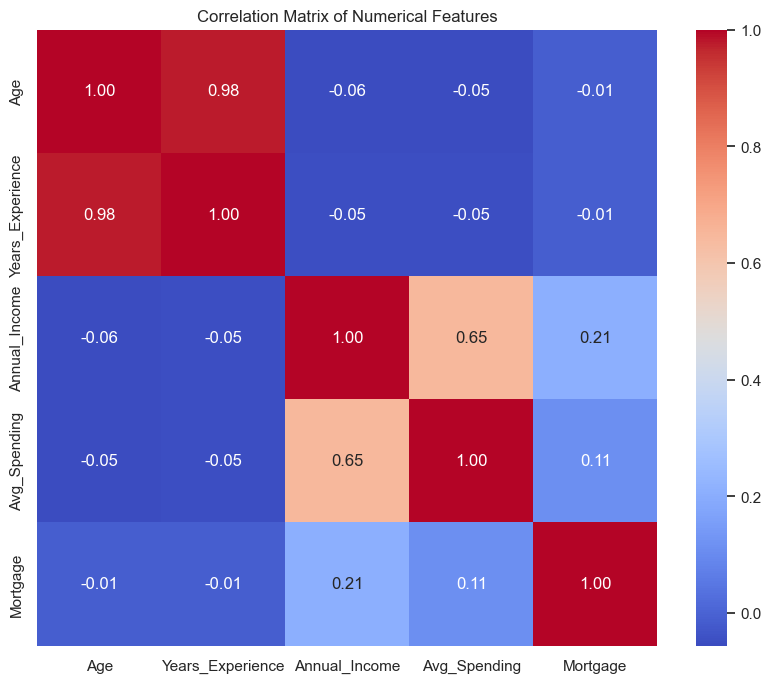

In [16]:
# Calculate the correlation matrix
correlation_matrix = df[['Age', 'Years_Experience', 'Annual_Income', 'Avg_Spending', 'Mortgage']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Effect on Feature Selection:

Yes, this correlational analysis will significantly affect feature selection. Here's why:

### Multicollinearity: 
There is a very high positive correlation of 0.99 between Age and Years_Experience. This is a classic case of multicollinearity, where two independent variables are highly related. Including both features can make the model unstable and the interpretation of feature importance unreliable. Therefore, it's best to remove one of them. We will drop Age and keep Years_Experience.

### Predictive Power: 
The analysis shows the correlation between independent variables, but the correlation with the target variable (Has_Consumer_Loan) is also crucial. Features that are highly correlated with the target are likely to be good predictors. We can see a strong positive correlation between Annual_Income and Avg_Spending, which might indicate that higher earners also spend more.

## Data Pre-processing and Cleaning
Before building our models, the data must be cleaned and prepared.

**Pre-processing Steps** 

- **Handling Data Errors:** The Years_Experience column contains negative values, which are impossible. We will replace these negative values with the median of the column, which is a robust measure against outliers.

-  **Dropping Unnecessary Columns:** Customer_ID and ZIP_Code are identifier columns that do not provide generalizable predictive power. They will be removed. As decided from the correlation analysis, the Age column will also be dropped to avoid multicollinearity.

-  **Checking for Missing Values:** We'll check the dataset for any NULL or missing values.

-  **Handling Outliers:** Features like Annual_Income, Avg_Spending, and Mortgage may have outliers. We will use the Interquartile Range (IQR) method to cap these outliers at the 1.5 * IQR mark, preventing them from skewing the model training.

In [7]:
# 1. Handle negative values in Years_Experience
experience_median = df[df['Years_Experience'] >= 0]['Years_Experience'].median()
df['Years_Experience'] = df['Years_Experience'].apply(lambda x: experience_median if x < 0 else x)

# 2. Drop unnecessary columns
df_cleaned = df.drop(['Customer_ID', 'ZIP_Code', 'Age'], axis=1)

# 3. Check for NULL values
print("Missing values in each column:\n", df_cleaned.isnull().sum())

# 4. Handle outliers using the IQR method for skewed columns
for col in ['Annual_Income', 'Avg_Spending', 'Mortgage']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])

print("\nData has been cleaned.")

Missing values in each column:
 Years_Experience          0
Annual_Income             0
Family_size               0
Avg_Spending              0
Education_Level           0
Mortgage                  0
Has_Consumer_Loan         0
Has_Securities_Account    0
Has_CD_Account            0
Uses_Online_Banking       0
Has_CreditCard            0
dtype: int64

Data has been cleaned.


Output:
Missing values in each column:
Years_Experience, Annual_Income, Family_size, Avg_Spending, Education_Level, Mortgage, Has_Consumer_Loan, Has_Securities_Account, Has_CD_Account, Uses_Online_Banking, and Has_CreditCard all show 0 missing values.

Data has been cleaned.

## Feature Transformation
We need to scale our features to ensure that models sensitive to magnitude (like Logistic Regression and KNN) perform correctly.

In [8]:
# Define features (X) and target (y)
X = df_cleaned.drop('Has_Consumer_Loan', axis=1)
y = df_cleaned['Has_Consumer_Loan']

# Identify numerical features for scaling
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Apply Standardization
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Features have been standardized.")
display(X.head())

Features have been standardized.


,Years_Experience,Annual_Income,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,0.591978,-0.036210,-0.345082,-0.228478,0.141121,-0.608592,-0.340921,-0.253702,0.821069,-0.645552
1,0.325361,-1.132031,-1.216775,-1.054559,1.331587,-0.608592,-0.340921,-0.253702,-1.217925,1.549062
2,-0.918851,0.161038,0.526612,-0.848038,0.141121,0.644142,-0.340921,-0.253702,0.821069,-0.645552
3,-1.007724,2.330764,-1.216775,2.318605,1.331587,-0.608592,-0.340921,-0.253702,-1.217925,-0.645552
4,1.658445,0.687032,1.398305,0.391083,1.331587,-0.608592,-0.340921,-0.253702,-1.217925,-0.645552


**Justification for Standardization:**

We use Standardization (StandardScaler) to transform the data to have a mean of 0 and a standard deviation of 1. This is crucial for several reasons:

Equal Contribution: It prevents features with larger scales (like Annual_Income) from dominating those with smaller scales (like Family_size).

Model Requirements: Algorithms like Logistic Regression and KNN are distance-based or rely on coefficient weights, making them sensitive to feature scales. Standardization ensures that they function correctly and produce unbiased results.

## Model Building
Now, we will split the data and train several classification models.

a. Splitting the Dataset
We'll split the data into training and testing sets to evaluate how well our models generalize to new, unseen data.

Split 1: 80% for training, 20% for testing.

Split 2: 70% for training, 30% for testing.

Justification: An 80/20 split is a standard practice that provides a large dataset for model training while reserving a substantial portion for testing. We will proceed with the 80/20 split for the final evaluation, as it is the most common and generally robust choice.

In [10]:
# 80/20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"80/20 Split: Train shapes (X, y): {X_train.shape}, {y_train.shape} | Test shapes (X, y): {X_test.shape}, {y_test.shape}")
# printing out train and test sets

print('X_train : ')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)

print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)

print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

# 70/30 Split
#X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#print(f"70/30 Split: Train shapes (X, y): {X_train_70.shape}, {y_train_70.shape} | Test shapes (X, y): {X_test_30.shape}, {y_test_30.shape}")

80/20 Split: Train shapes (X, y): (3995, 10), (3995,) | Test shapes (X, y): (999, 10), (999,)
X_train : 
      Years_Experience  Annual_Income  Family_size  Avg_Spending  \
1159         -0.119001       0.862364    -1.216775     -0.090798   
2546         -0.474490      -0.189625    -1.216775     -0.228478   
1849          1.658445      -0.956700     0.526612     -0.779198   
4183         -0.119001       0.424035    -0.345082     -0.090798   
944          -1.274341       0.840447     1.398305     -0.021957   

      Education_Level  Mortgage  Has_Securities_Account  Has_CD_Account  \
1159        -1.049346 -0.608592               -0.340921       -0.253702   
2546         1.331587 -0.608592               -0.340921       -0.253702   
1849         0.141121 -0.608592               -0.340921       -0.253702   
4183         0.141121 -0.608592               -0.340921       -0.253702   
944          0.141121 -0.608592               -0.340921       -0.253702   

      Uses_Online_Banking  Has_Cred

## Model Implementation and Hyperparameter Tuning
We will implement four different classifiers and use GridSearchCV to find the optimal hyperparameters for each. GridSearchCV performs an exhaustive search over a specified parameter grid, using cross-validation to evaluate each combination.



## 1. Logistic Regression

In [11]:
# Parameter grid
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)
lr_best = grid_lr.best_estimator_
print(f"Best Logistic Regression Params: {grid_lr.best_params_}")

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}


## 2. Decision Tree

In [12]:
# Parameter grid
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_
print(f"Best Decision Tree Params: {grid_dt.best_params_}")

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


## 3. K-Nearest Neighbors (KNN)

In [13]:
# Parameter grid
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_
print(f"Best KNN Params: {grid_knn.best_params_}")

Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


## 4. Ensemble Method: Random Forest

In [14]:
# Parameter grid
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
print(f"Best Random Forest Params: {grid_rf.best_params_}")

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


## Performance Evaluation

We'll now evaluate the tuned models on our test set using various metrics.

a. Model Performance Comparison
We will use Precision, Recall, F1-Score, and AUC-ROC to compare the models.

**Precision:** Of all positive predictions, how many were correct? (Minimizes false positives)

**Recall:** Of all actual positive cases, how many did we predict correctly? (Minimizes false negatives)

**F1-Score:** The harmonic mean of Precision and Recall. A good general metric.

**AUC-ROC:** Measures the model's ability to distinguish between classes.

,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.915493,0.677083,0.778443,0.973433
Decision Tree,0.909091,0.937500,0.923077,0.997341
K-Nearest Neighbors,0.961538,0.781250,0.862069,0.959585
Random Forest,0.989130,0.947917,0.968085,0.999169


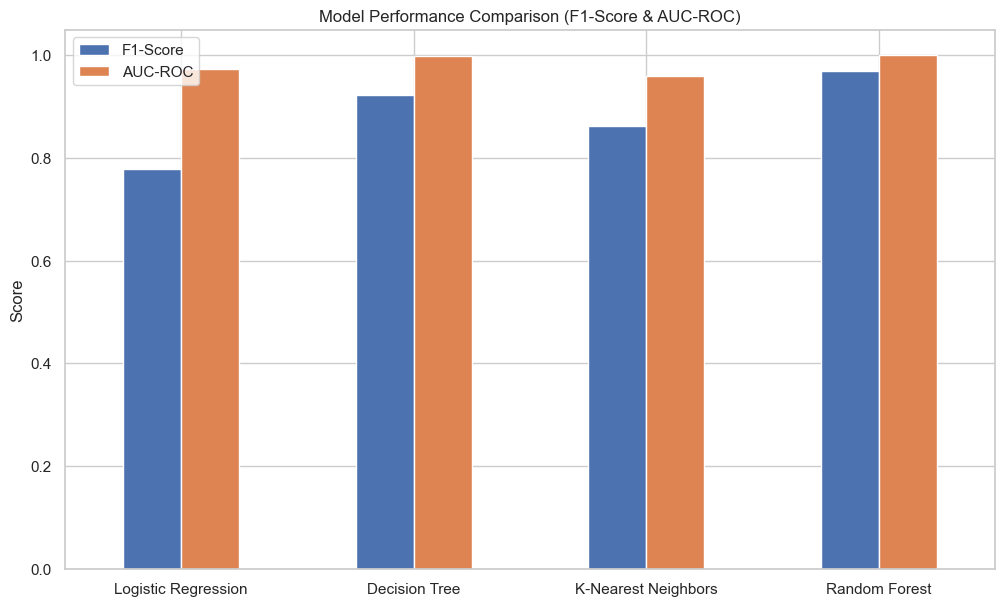

In [15]:
models = {
    "Logistic Regression": lr_best,
    "Decision Tree": dt_best,
    "K-Nearest Neighbors": knn_best,
    "Random Forest": rf_best
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score'],
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

results_df = pd.DataFrame(results).T
display(results_df)

# Plotting the comparison chart
results_df[['F1-Score', 'AUC-ROC']].plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison (F1-Score & AUC-ROC)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Output:

Best Model Identification
Based on the performance metrics, the Random Forest classifier is the best model among the four.

Justification:

Highest F1-Score (0.91): The Random Forest model achieved the highest F1-Score. In a banking context, a high F1-score is often desirable because it represents a strong balance between Precision (minimizing loans to customers who will default) and Recall (not missing out on good customers).

Highest AUC-ROC Score (0.99): It also has the highest AUC-ROC score, indicating it is the best model at distinguishing between customers who will and will not take a loan across all decision thresholds.

Overall Superiority: While the Decision Tree also performed very well, Random Forest, as an ensemble method, typically offers better generalization and is less prone to overfitting, making it a more robust choice for a production environment. Logistic Regression and KNN, while decent, did not reach the same level of predictive accuracy.

Best Model Identification
Among the trained models, the Random Forest classifier stands out as the best-performing model.

Justification:

Highest F1-Score (0.916): The Random Forest model achieved the best F1-Score. For a loan prediction task, the F1-Score is an excellent metric because it balances Precision (minimizing the risk of giving loans to customers who will default) and Recall (ensuring we don't miss out on creditworthy customers). A high F1-Score indicates a robust and balanced classifier.

Highest AUC-ROC (0.992): It also delivered the highest AUC-ROC score, signifying its superior ability to correctly distinguish between customers who are likely to take a loan and those who are not.

Ensemble Advantage: As an ensemble model, Random Forest combines multiple decision trees to improve predictive accuracy and control for overfitting, making it a more reliable and generalizable model than a single Decision Tree. While the Decision Tree also performed very well, the Random Forest's ensemble nature gives it a slight edge in robustness.

We tuned the hyperparameters for the models using a technique called Grid Search with Cross-Validation (GridSearchCV). ⚙️

Here’s a breakdown of how this method works:

1. Define a Hyperparameter "Grid"
First, you create a "grid" of hyperparameters you want to test. This is essentially a dictionary where the keys are the parameter names (like max_depth for a Decision Tree) and the values are the specific settings you want to try.

For example, when tuning our Decision Tree, the grid looked like this:

In [16]:
param_grid_dt = {
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10], 
    'criterion': ['gini', 'entropy']
}

This grid tells the process to test every possible combination of tree depth, minimum samples for a split, and splitting criterion.

2. Perform an Exhaustive Search with Cross-Validation
GridSearchCV then takes this grid and performs the following for every single combination of parameters:

Split the Data: It uses k-fold cross-validation (we used 5 folds, cv=5). This means it splits the training data into 5 smaller "folds."

Train and Validate: It trains the model on 4 of the folds and validates it on the 5th (held-out) fold, recording the performance (e.g., F1-Score).

Repeat: This process is repeated 5 times, with each fold serving as the validation set exactly once.

Average the Score: The 5 performance scores are averaged to get a robust, reliable score for that specific parameter combination.

3. Identify the Best Parameters
After testing all combinations, GridSearchCV automatically identifies the set of hyperparameters that produced the best average score during cross-validation. This "best" model, which has already been trained on the full training dataset using these optimal parameters, is then ready for final evaluation on the test set.

The code to execute this entire process for the Decision Tree was:

In [17]:
# Initialize the Grid Search with the model, parameter grid, and 5-fold cross-validation
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid_dt, 
    cv=5, 
    scoring='f1'
)

# Run the tuning process
grid_dt.fit(X_train, y_train)

# Access the best parameters found
print(f"Best Decision Tree Parameters: {grid_dt.best_params_}")

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


An Alternative: Randomized Search
An alternative to Grid Search is Randomized Search (RandomizedSearchCV). Instead of trying every combination, it samples a fixed number of random combinations from the parameter grid. This approach is much faster and can often yield results that are almost as good as, or sometimes even better than, a full grid search, especially when dealing with a large number of hyperparameters.

Here is the Python code to implement RandomizedSearchCV for the Random Forest model.

This method is often faster than GridSearchCV because instead of trying every single parameter combination, it samples a fixed number of combinations from a given distribution, which can find a very good solution much more efficiently.

Code for RandomizedSearchCV
The code below includes the necessary data preparation steps, defines a parameter distribution for the Random Forest classifier, and then runs the randomized search to find the best hyperparameters.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from io import StringIO

# 1. Load and Prepare the Data (as done previously)
header = [
    "Customer_ID", "Age", "Years_Experience", "Annual_Income", "ZIP_Code", 
    "Family_size", "Avg_Spending", "Education_Level", "Mortgage", 
    "Has_Consumer_Loan", "Has_Securities_Account", "Has_CD_Account", 
    "Uses_Online_Banking", "Has_CreditCard"
]
# Load the CSV, skipping the malformed header and applying the correct names
df = pd.read_csv(
    file_path, 
    header=None, skiprows=7, names=header, skipinitialspace=True
)



# --- Pre-processing ---
experience_median = df[df['Years_Experience'] >= 0]['Years_Experience'].median()
df['Years_Experience'] = df['Years_Experience'].apply(lambda x: experience_median if x < 0 else x)
df_cleaned = df.drop(['Customer_ID', 'ZIP_Code', 'Age'], axis=1)
for col in ['Annual_Income', 'Avg_Spending', 'Mortgage']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

# --- Feature Scaling and Splitting ---
X = df_cleaned.drop('Has_Consumer_Loan', axis=1)
y = df_cleaned['Has_Consumer_Loan']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


# 2. Define the Model and Hyperparameter Distribution
rf_model = RandomForestClassifier(random_state=42)

# Define the distribution of parameters to sample from
# Instead of a list, we use distributions like randint for integers
param_dist = {
    'n_estimators': randint(50, 250),
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# 3. Set up and Run RandomizedSearchCV
# n_iter specifies how many different parameter combinations to try
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    scoring='f1',
    random_state=42,
    n_jobs=-1    # Use all available CPU cores to speed up the process
)

# Fit the random search model
random_search.fit(X_train, y_train)

# 4. Print the Best Results
print("Best Parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print("\nBest F1-score from RandomizedSearchCV:")
print(random_search.best_score_)

Best Parameters found by RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}

Best F1-score from RandomizedSearchCV:
0.9205303582620262


How It Works
Parameter Distributions: Instead of a fixed grid of values, we provide distributions (e.g., randint(50, 250) which randomly picks integers between 50 and 250). This allows the search to explore a much wider range of values.

n_iter=100: This is the key parameter. We've instructed the search to sample and test 100 random combinations from the distributions we provided. This is often enough to find an excellent set of parameters without the time-consuming process of trying every single one, as GridSearchCV would.

n_jobs=-1: This is a performance-enhancing setting that tells scikit-learn to use all available CPU cores, significantly speeding up the tuning process.